<a href="https://colab.research.google.com/github/U-Harshitha/MedicalDetector/blob/main/multiplediseases/catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train_df = shuffle(pd.read_csv('Training.csv').iloc[:, :-1])
test_df = pd.read_csv('Testing.csv')

train_df.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
2870,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1828,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
3884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Varicose veins
26,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,GERD
2200,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Malaria


In [ ]:
train_x = train_df.iloc[:, :-1]
train_y = train_df.iloc[:, -1]

test_x = test_df.iloc[:, :-1]
test_y = test_df.iloc[:, -1]

In [ ]:
print(test_y.unique().tolist())

['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo']


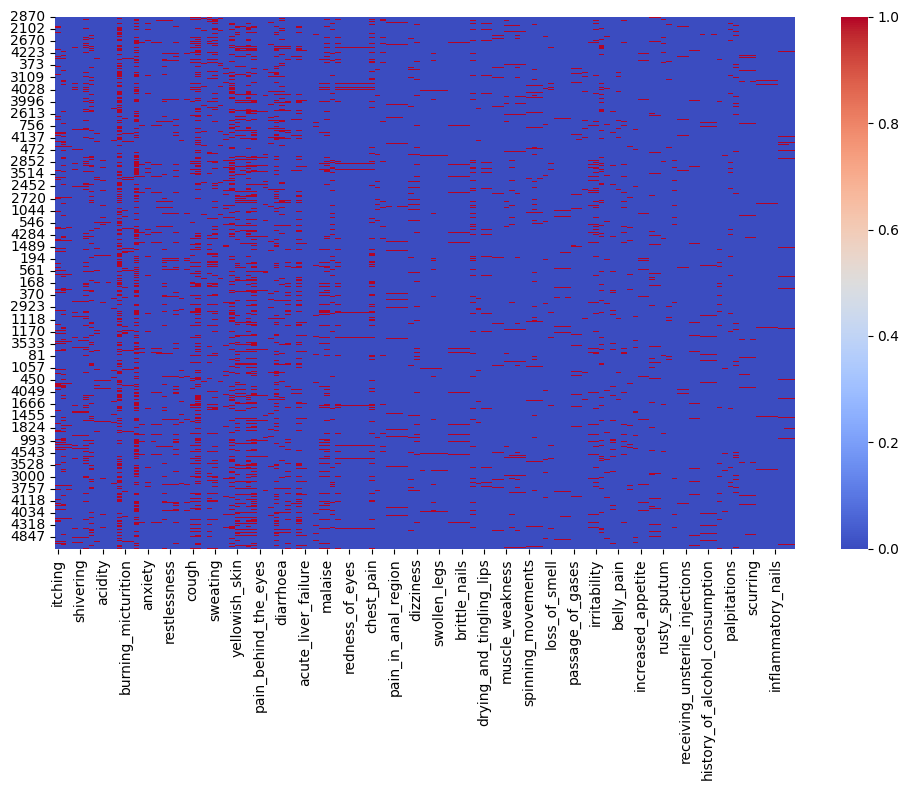

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_x, cmap='coolwarm', cbar=True)
plt.tight_layout()
plt.show()

In [ ]:
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=2, loss_function='MultiClass', verbose=False)
model.fit(train_x, train_y)

predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9761904761904762


In [ ]:
model.fit(train_x, train_y)

In [ ]:
predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9761904761904762


In [ ]:
import pickle

In [ ]:
filename = 'multiple_diseases.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('multiple_diseases.sav', 'rb'))